In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 11s 0us/step


In [ ]:
y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255
y_test_proc.shape

(10000, 100)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [ ]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x=layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(100, activation='softmax')(x)


vgg_net_model = keras.Model(inputs, outputs)

In [ ]:
vgg_net_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 32)       

In [ ]:
%load_ext tensorboard
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='tensorboard',histogram_freq=1)
vgg_net_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001,clipvalue=0.7,clipnorm=0.7),
              loss='categorical_crossentropy',
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='vgg_adam_dropout.hdf5',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
# vgg_net_model.fit(x_train,y_proc,batch_size=200,validation_data=(x_test,y_test_proc),epochs=50,callbacks=[callback,model_checkpoint_callback])
output=vgg_net_model.fit_generator(datagen.flow(x_train,y_proc,batch_size = 200), epochs = 200, validation_data = (x_test,y_test_proc),callbacks = [tensor_board,callback,model_checkpoint_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/200
250/250 [==============================] - 24s 95ms/step - loss: 4.4696 - acc: 0.0203 - val_loss: 4.3233 - val_acc: 0.0316
Epoch 2/200
250/250 [==============================] - 23s 94ms/step - loss: 4.2477 - acc: 0.0405 - val_loss: 4.1533 - val_acc: 0.0558
Epoch 3/200
250/250 [==============================] - 23s 94ms/step - loss: 4.1171 - acc: 0.0554 - val_loss: 4.0320 - val_acc: 0.0673
Epoch 4/200
250/250 [==============================] - 23s 93ms/step - loss: 3.9952 - acc: 0.0730 - val_loss: 3.9322 - val_acc: 0.0851
Epoch 5/200
250/250 [==============================] - 23s 93ms/step - loss: 3.8870 - acc: 0.0944 - val_loss: 3.8046 - val_acc: 0.1116
Epoch 6/200
250/250 [==============================] - 24s 95ms/step - loss: 3.8168 - acc: 0.1057 - val_loss: 3.7277 - val_acc: 0.1246
Epoch 7/200
250/250 [==============================] - 23s 93ms/step - loss: 3.7461 - acc: 0.1181 - 

In [ ]:


y_pred=vgg_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

Precision: 0.37127885172616765
Recall: 0.3585
Accuracy: 0.3585


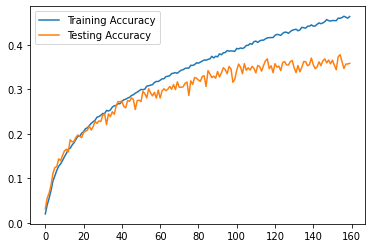

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])


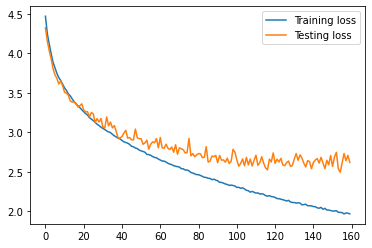

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.legend(['Training loss','Testing loss'])

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255
y_test_proc.shape

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x=layers.Dropout(0.01)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x=layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(100, activation='softmax')(x)


vgg_net_model = keras.Model(inputs, outputs)

vgg_net_model.load_weights('../weights/vgg_adam_dropout.hdf5')


y_pred=vgg_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

169009152/169001437 [==============================] - 6s 0us/step
Precision: 0.38861006545930216
Recall: 0.3779
Accuracy: 0.3779
